# Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame, concat



import pandas as pd


# Import dataset


In [3]:
df = pd.read_excel("C:/Users/Shehzad/Desktop/Git/Time series forecasting/Sample - Superstore (1).xls")

In [4]:
furniture = df.loc[df['Category'] == 'Furniture']


# check start and end date of the dataset


In [5]:
furniture['Order Date'].min(), furniture['Order Date'].max()


(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# Remove columns not in use

In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)



C:\Users\Shehzad\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
#sort the values by order date
furniture = furniture.sort_values('Order Date')


In [8]:
#check for missing values
furniture.isnull().sum()


Order Date    0
Sales         0
dtype: int64

In [9]:

#set index
furniture = furniture.set_index('Order Date')


# Visualize the Dataset

# Now taking the average of daily sales values and to visualize the dataset properly taking the MS(month start as frequency)of the dataset

In [11]:
y = furniture['Sales'].resample('MS').mean()


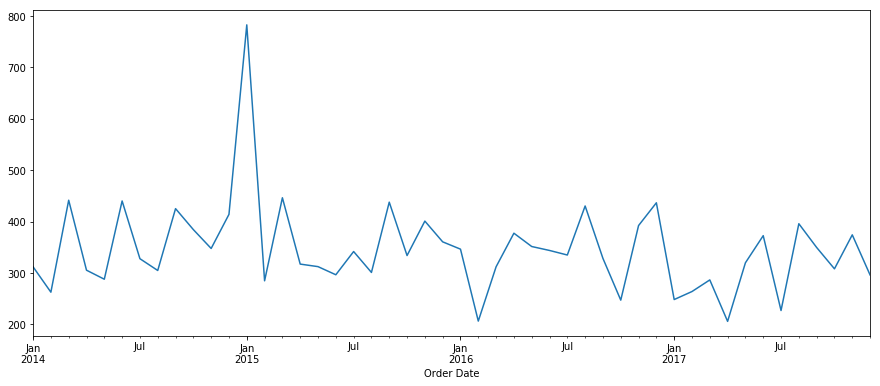

In [12]:

y.plot(figsize=(15, 6))
plt.show()


In [13]:

df1= pd.DataFrame(y)


# Check for outliers

[[3.86338501e-01]
 [9.40983304e-01]
 [1.07015657e+00]
 [4.60064726e-01]
 [6.57300850e-01]
 [1.05406487e+00]
 [2.08822499e-01]
 [4.66320104e-01]
 [8.86383756e-01]
 [4.27685477e-01]
 [1.50901825e-02]
 [7.60879308e-01]
 [4.90545813e+00]
 [6.92048563e-01]
 [1.12397903e+00]
 [3.26517623e-01]
 [3.82153751e-01]
 [5.59835877e-01]
 [5.19380958e-02]
 [5.09150879e-01]
 [1.02796816e+00]
 [1.39520092e-01]
 [6.13722440e-01]
 [1.60115740e-01]
 [1.07752835e-04]
 [1.57302938e+00]
 [3.85264410e-01]
 [3.48742802e-01]
 [5.78659748e-02]
 [2.82992533e-02]
 [1.28078600e-01]
 [9.44437021e-01]
 [2.02549218e-01]
 [1.11488413e+00]
 [5.16337393e-01]
 [1.01410880e+00]
 [1.10188364e+00]
 [9.26569881e-01]
 [6.72631718e-01]
 [1.57936605e+00]
 [2.98306054e-01]
 [2.95087818e-01]
 [1.34174293e+00]
 [5.56318095e-01]
 [3.66481575e-02]
 [4.30198381e-01]
 [3.13001675e-01]
 [5.64360666e-01]]


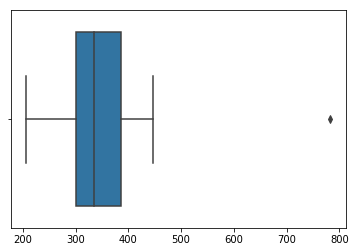

In [14]:

import seaborn as sns
sns.boxplot(x=df1)

from scipy import stats
import numpy as np


#using Zscore get outliers
z = np.abs(stats.zscore(df1))
print(z)


In [15]:

#set threshold
threshold = 3
print(np.where(z > 3))


low = .10
high = .95
quant_df = df1.quantile([low,high])
print(quant_df)


df1 = df1.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                (x< quant_df.loc[high,x.name])],axis=0)
df1.isna().sum()

(array([12], dtype=int64), array([0], dtype=int64))
           Sales
0.10  258.516200
0.95  441.134235


Sales    0
dtype: int64

# Handling missing dates

In [16]:

idz = pd.DataFrame(pd.DatetimeIndex(pd.date_range('2014-01-01', '2017-12-01', freq = 'MS')))

idz.index = idz.iloc[:,0]
#idz.index = idz.index.strftime('%Y-%m-%d')


In [17]:
#data which is missing 
s = df1.reindex(idz[0], fill_value=np.nan)


In [19]:
#missing data replaced by nan of the data
s.isna().sum()
s.columns = ['Sales']



Removed the outliers from the dataframe with the help of interpolation method
Treat missing values using interpolation method
If there are outliers in the dataset direct use of interpolation method will help solve the problem.



In [21]:
df8=s.interpolate()

# Visualize dataset



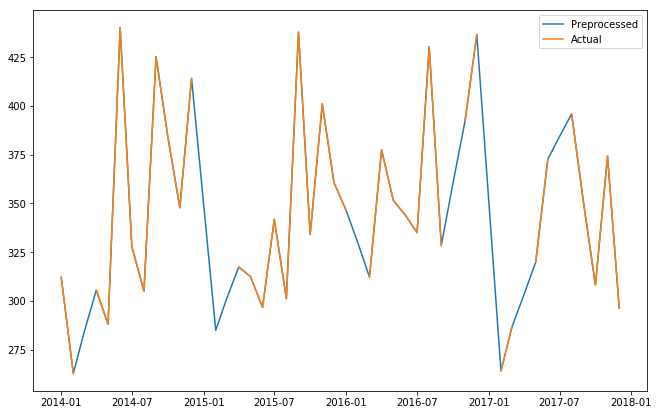

In [22]:
plt.figure(figsize=(11,7))
plt.plot(df8, label = 'Preprocessed')
plt.plot(s, label ='Actual')
plt.legend()

# Check outliers


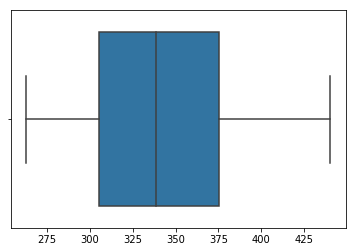

In [23]:
sns.boxplot(x=df8)


# No outliers found dataset is ready for Time series Analysis
